In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("hate.csv" , encoding='latin1')  
# We have to specify the encoding type because by default it encode in UTF-8 encoding and it gives error 
# Therefore we encoded it in latin1

## Going through data

In [3]:
data.shape

(41144, 3)

In [4]:
data.columns

Index(['Unnamed: 0', 'comment', 'label'], dtype='object')

In [5]:
data['label'].unique()

array(['N', 'P', 'O'], dtype=object)

In [6]:
data.head()

,Unnamed: 0,comment,label
0,1,dalits are lowlives,N
1,2,gay people are a burden to our society,N
2,3,Arabs are not welcome,N
3,4,I'm not saying we should actually eliminate he...,N
4,5,bananas are for black people,N


In [7]:
#Used this because comment are not displaying full 
pd.set_option('display.max_colwidth', None)

In [8]:
# Checking NULL values
data.isnull().sum()

Unnamed: 0    0
comment       0
label         0
dtype: int64

In [9]:
print(data['label'].value_counts())
label_counts = data['label'].value_counts()

label
N    22158
P    18950
O       36
Name: count, dtype: int64


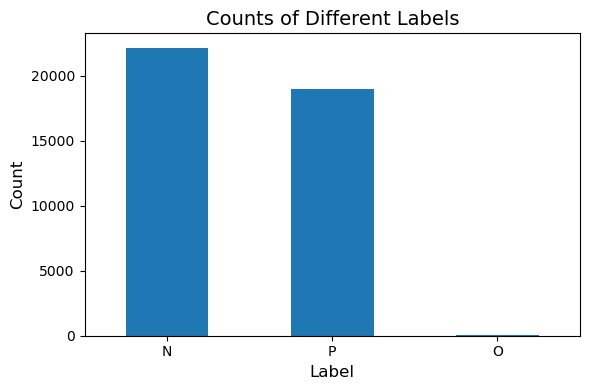

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  

label_counts.plot(kind='bar')

plt.xlabel('Label', fontsize=12)  
plt.ylabel('Count', fontsize=12) 
plt.title('Counts of Different Labels', fontsize=14)  

plt.xticks(rotation=0)  

plt.tight_layout()
plt.show()


In [11]:
#From this figure we can clearly see that there is the label 'O' has too less data compared to other two labels 
#which leads to data imbalance
#It can lead to biased result 

## Data Cleaning

In [12]:
# In NLP dataset the data cleaning is of different type
# The data cleaning includes
#1 - Text Lowercasing
#2 - Remove special characters, punctuation, and symbols
#3 - Remove numbers and non-alphabetic characters
#4 - Remove stop words
#5 - Tokenization (Most Important)
#6 - Stemming or Lemmatization

##### Text Lowercasing

In [13]:
#We use pre-built method for this
data['comment'] = data['comment'].str.lower()


##### Remove special characters, punctuation, and symbols

In [14]:
import re 
#re module in python is used for working with regular expression and also string manipulation

In [15]:
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'  # Define regex pattern to match symbols, special characters, and punctuation
    return re.sub(pattern, '', text)  

data['comment'] = data['comment'].apply(remove_special_characters)

##### Remove Stop Words

In [16]:
import nltk
#This is Natural Language Toolkit Library used in NLP
#It is the most popular library

from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    
    cleaned_text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return cleaned_text

data['comment'] = data['comment'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Tokenization 

In [17]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize_text(text):
    return word_tokenize(text)
data['token'] = data['comment'].apply(tokenize_text)


[nltk_data] Downloading package punkt to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Stemming

In [18]:
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer = PorterStemmer()
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  
    return stemmed_tokens

data['stemmed_token'] = data['token'].apply(stem_tokens)

[nltk_data] Downloading package punkt to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### lemmatisation

In [19]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Example function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Assuming 'data' is your DataFrame with a column 'stemmed_token'
data['lemmatized_token'] = data['stemmed_token'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to C:\Users\Prayas
[nltk_data]     jain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
data['cleaned_text'] = data['lemmatized_token'].apply(lambda tokens: ' '.join(tokens))


In [21]:
data

,Unnamed: 0,comment,label,token,stemmed_token,lemmatized_token,cleaned_text
0,1,dalits lowlives,N,"[dalits, lowlives]","[dalit, lowliv]","[dalit, lowliv]",dalit lowliv
1,2,gay people burden society,N,"[gay, people, burden, society]","[gay, peopl, burden, societi]","[gay, peopl, burden, societi]",gay peopl burden societi
2,3,arabs welcome,N,"[arabs, welcome]","[arab, welcom]","[arab, welcom]",arab welcom
3,4,im saying actually eliminate heebs wish naturally became extinct,N,"[im, saying, actually, eliminate, heebs, wish, naturally, became, extinct]","[im, say, actual, elimin, heeb, wish, natur, becam, extinct]","[im, say, actual, elimin, heeb, wish, natur, becam, extinct]",im say actual elimin heeb wish natur becam extinct
4,5,bananas black people,N,"[bananas, black, people]","[banana, black, peopl]","[banana, black, peopl]",banana black peopl
...,...,...,...,...,...,...,...
41139,117100,indian culture backwards,N,"[indian, culture, backwards]","[indian, cultur, backward]","[indian, cultur, backward]",indian cultur backward
41140,118100,women dont want equality want charge,N,"[women, dont, want, equality, want, charge]","[women, dont, want, equal, want, charg]","[woman, dont, want, equal, want, charg]",woman dont want equal want charg
41141,119100,fuck covid,P,"[fuck, covid]","[fuck, covid]","[fuck, covid]",fuck covid
41142,1205,computer garbage,P,"[computer, garbage]","[comput, garbag]","[comput, garbag]",comput garbag
